In [80]:
import scanpy as sc

import numpy as np

import os
import re

In [ ]:
# scp -r philipp@172.27.41.194:/home/philipp/Work/VisiumMS/out Python_projects/VisiumMS/out

In [78]:
sc._settings.ScanpyConfig.figdir

In [43]:
gene_list = np.array(["GFAP", "ADCY2", "AQP4", "CFAP299", "CFAP43", "SPAG17", "IGHG1", "IGKC", "FCRL5", "FLT1", "CLDN5", "VWF", "APOE", "CD74", "FTL", "LRMDA", "ARHGAP24", "TBXAS1", "PDGFRA", "PTPRZ1", "PCDH15", "MOG", "ST18", "MOBP", "BCAS1", "SIRT2", "GPR17", "LAMA2", "CEMIP", "ABCA9", "PARP8", "SKAP1", "PRKCH"])

In [79]:
current_folder = globals()['_dh'][0]
out_folder = current_folder / ".." / ".." / "out"
sc._settings.ScanpyConfig.figdir = out_folder

In [45]:
# load the annoated object
annoated = sc.read_h5ad(current_folder / ".." / ".." / "data" / "uscsc_dump" / "annotated.h5ad")
annoated.obs.index = [re.sub("-[0-9]+$", "", barcode) for barcode in annoated.obs.index]
annoated

AnnData object with n_obs × n_vars = 69526 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'diss_score', 'patient_id', 'sample_id', 'lesion_type', 'spots_detected', 'total_genes', 'prop_reads_in_spots', 'median_genes', 'median_UMI', 'seq_saturation', 'rin', 'sex', 'age', 'duration_disease', 'batch', 'leiden', 'cell_type'
    var: 'highly_variable', 'highly_variable_nbatches', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [46]:
raw_location = current_folder / ".." / ".." / "data" / "raw_old_sn"
#annotated_location = current_folder / ".." / ".." / "data" / 
samples = [sample for sample in os.listdir(raw_location) if not sample.startswith(".")]

In [47]:
adata_objects = {sample: sc.read_h5ad(raw_location / sample / "cell_bender_matrix_filtered_qc.h5") for sample in samples}

In [48]:
adata_objects.keys()

dict_keys(['MS411', 'MS466', 'MS497T', 'CO74', 'MS377I', 'MS377T', 'MS549T', 'MS497I', 'CO85', 'CO40', 'MS549H'])

7703


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


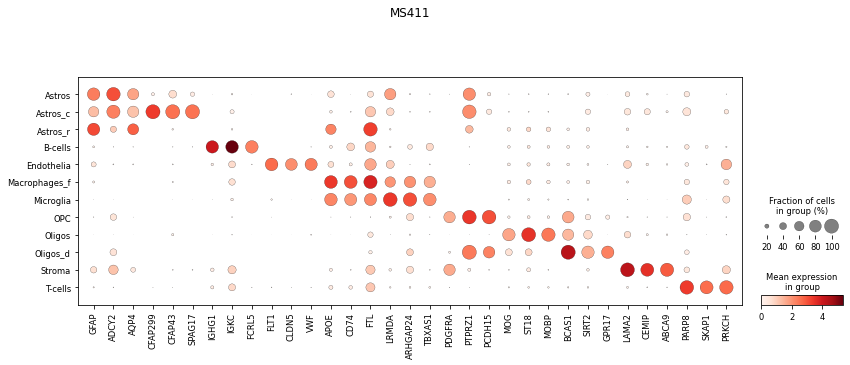

2610


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


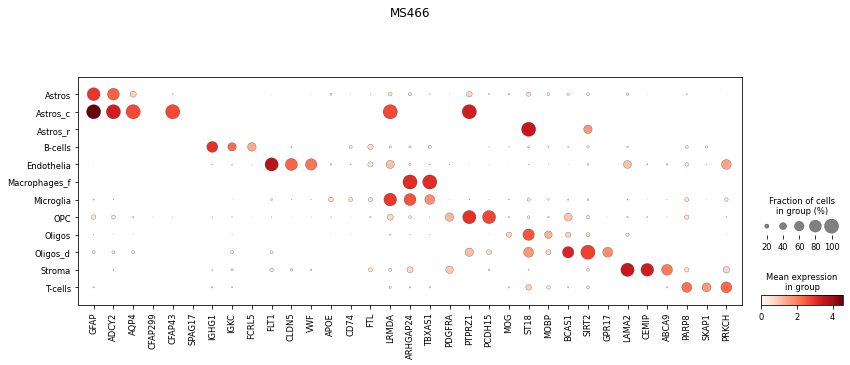

6683


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


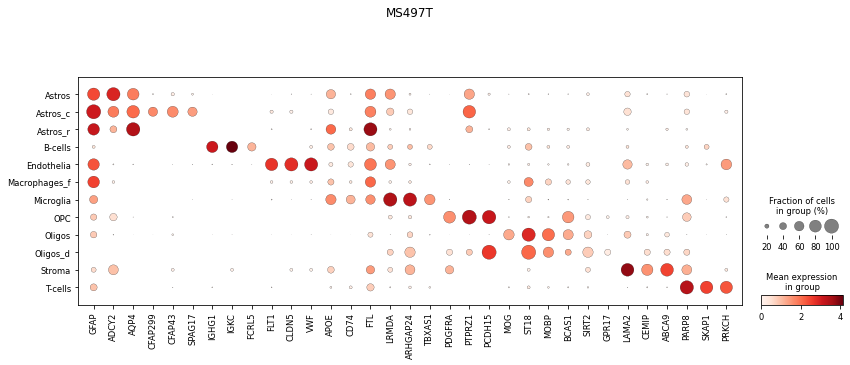

3114


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


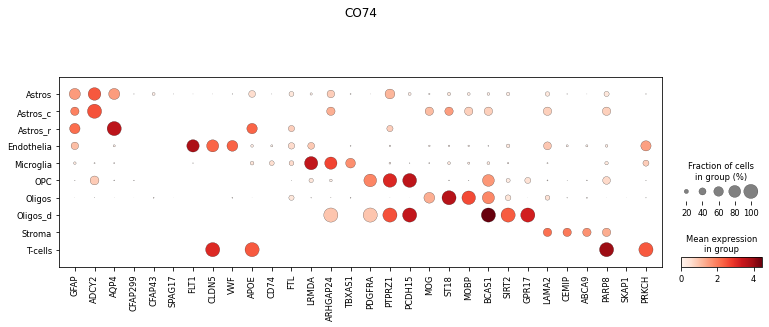

6784


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


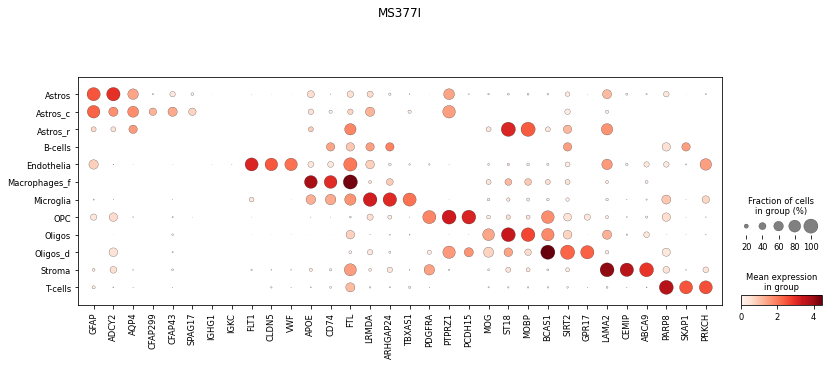

7055


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


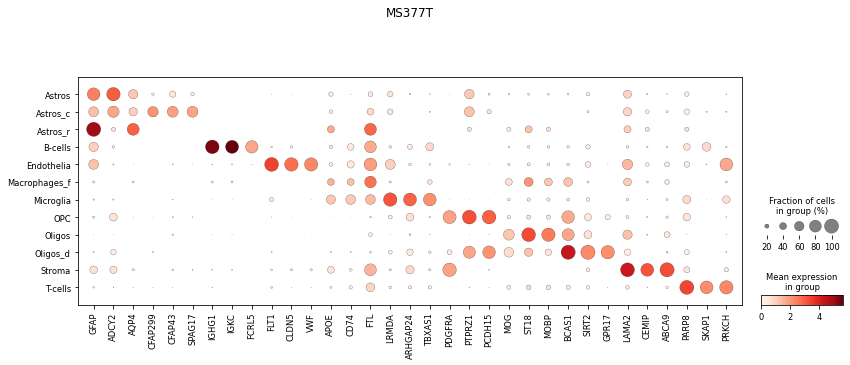

4912


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


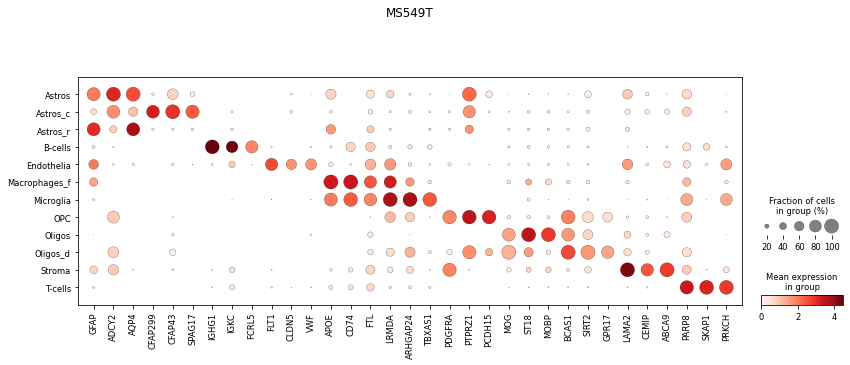

3452


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


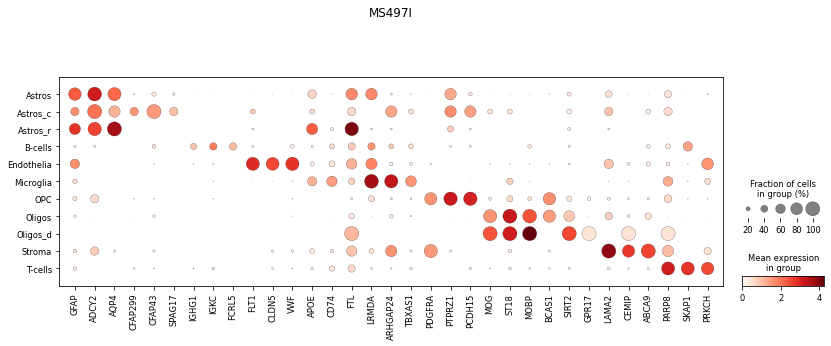

3291


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


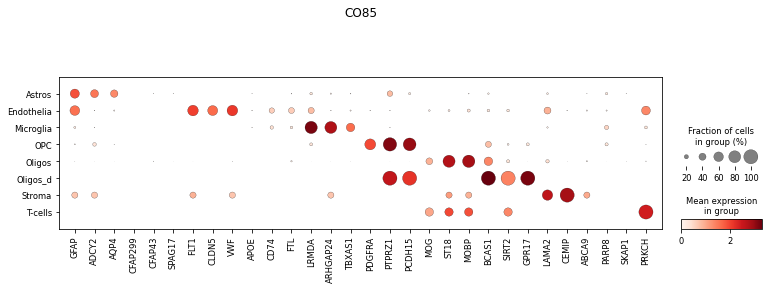

7265


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


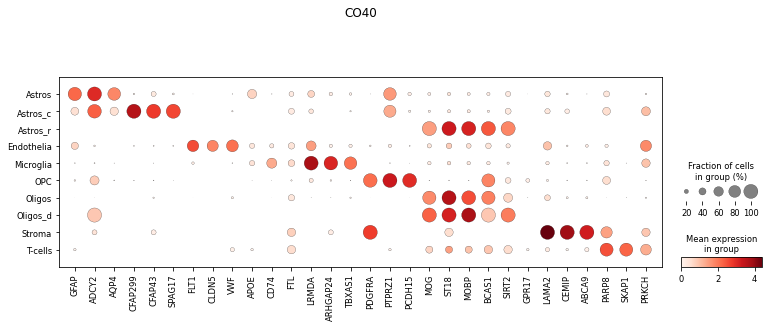

10874


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


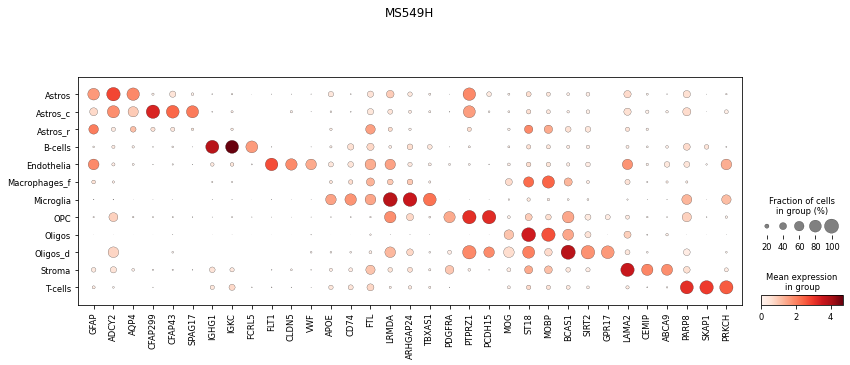

In [49]:
for sample in adata_objects.keys():
    adata = adata_objects[sample]
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    subset = annoated[annoated.obs.sample_id==sample, ]
    common_cells = list(set(subset.obs_names) & set(adata.obs_names))
    #print(len(common_cells))
    adata = adata[common_cells]
    adata.obs = subset[common_cells].obs
    #assert np.all(np.array([elem in adata.var_names for elem in gene_list]))
    celltypes = np.unique(adata.obs.cell_type)
    genes = gene_list[np.isin(gene_list, adata.var_names)]
    sc.pl.dotplot(adata, var_names=genes, groupby="cell_type", title=sample)

In [52]:
adata_objects = {sample: sc.read_h5ad(raw_location / sample / "cell_bender_matrix_filtered_qc.h5") for sample in samples}
adata_list = []
for sample in adata_objects.keys():
    adata = adata_objects[sample]
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    subset = annoated[annoated.obs.sample_id==sample, ]
    common_cells = list(set(subset.obs_names) & set(adata.obs_names))
    adata = adata[common_cells]
    adata.obs = subset[common_cells].obs
    adata_list.append(adata)

In [54]:
adata_global = sc.concat(adata_list)

/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


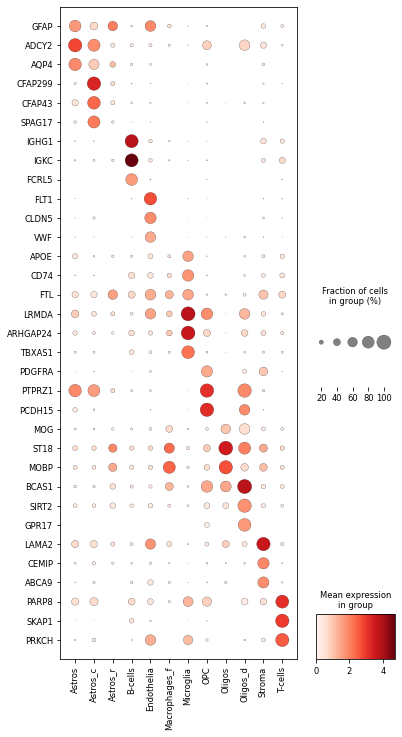

In [81]:
sc.pl.dotplot(adata, var_names=gene_list, groupby="cell_type", swap_axes=True, figsize=(6, 12), save="dotplot.png")

In [73]:
str(out_folder / "dotplot.png")

'/home/philipp/Work/VisiumMS/scripts/process/../../out/dotplot.png'

/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


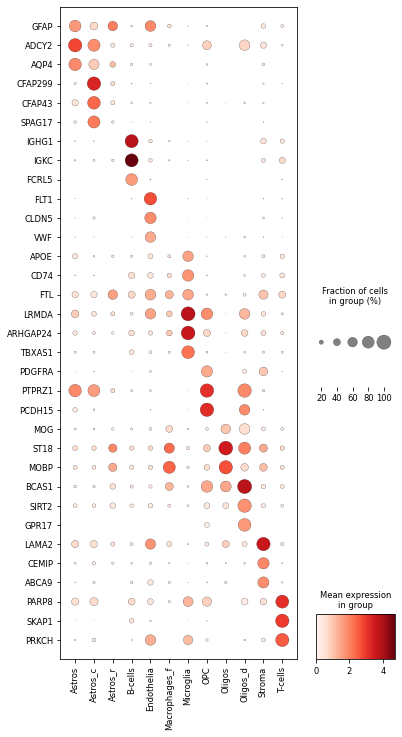

In [82]:
sc.pl.dotplot(adata, var_names=gene_list, groupby="cell_type", swap_axes=True, figsize=(6, 12), save=True)

In [69]:
current_folder / ".." / ".." / "out"

['test.txt']